<a href="https://colab.research.google.com/github/alexander-toschev/cv-course/blob/main/FD_SURF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In last chapter, we saw SIFT for keypoint detection and description. But it was comparatively slow and people needed more speeded-up version. In 2006, three people, Bay, H., Tuytelaars, T. and Van Gool, L, published another paper, “SURF: Speeded Up Robust Features” which introduced a new algorithm called SURF. As name suggests, it is a speeded-up version of SIFT.

In SIFT, Lowe approximated Laplacian of Gaussian with Difference of Gaussian for finding scale-space. SURF goes a little further and approximates LoG with Box Filter. Below image shows a demonstration of such an approximation. One big advantage of this approximation is that, convolution with box filter can be easily calculated with the help of integral images. And it can be done in parallel for different scales. Also the SURF rely on determinant of Hessian matrix for both scale and location.

![image](https://github.com/alexander-toschev/cv-course/raw/main/data/surf_boxfilter.jpg)

For orientation assignment, SURF uses wavelet responses in horizontal and vertical direction for a neighbourhood of size 6s. Adequate guassian weights are also applied to it. Then they are plotted in a space as given in below image. The dominant orientation is estimated by calculating the sum of all responses within a sliding orientation window of angle 60 degrees. Interesting thing is that, wavelet response can be found out using integral images very easily at any scale. For many applications, rotation invariance is not required, so no need of finding this orientation, which speeds up the process. SURF provides such a functionality called Upright-SURF or U-SURF. It improves speed and is robust upto \pm 15^{\circ}. OpenCV supports both, depending upon the flag, upright. If it is 0, orientation is calculated. If it is 1, orientation is not calculated and it is more faster

![image](https://github.com/alexander-toschev/cv-course/raw/main/data/surf_orientation.jpg)

For feature description, SURF uses Wavelet responses in horizontal and vertical direction (again, use of integral images makes things easier). A neighbourhood of size 20sX20s is taken around the keypoint where s is the size. It is divided into 4x4 subregions. For each subregion, horizontal and vertical wavelet responses are taken and a vector is formed like this,$ v=( \sum{d_x}, \sum{d_y}, \sum{|d_x|}, \sum{|d_y|})$. 

This when represented as a vector gives SURF feature descriptor with total 64 dimensions. Lower the dimension, higher the speed of computation and matching, but provide better distinctiveness of features.

For more distinctiveness, SURF feature descriptor has an extended 128 dimension version. The sums of d_x and |d_x| are computed separately for d_y < 0 and d_y $\geq 0$. Similarly, the sums of d_y and |d_y| are split up according to the sign of d_x , thereby doubling the number of features. It doesn’t add much computation complexity. OpenCV supports both by setting the value of flag extended with 0 and 1 for 64-dim and 128-dim respectively (default is 128-dim)

Another important improvement is the use of sign of Laplacian (trace of Hessian Matrix) for underlying interest point. It adds no computation cost since it is already computed during detection. The sign of the Laplacian distinguishes bright blobs on dark backgrounds from the reverse situation. In the matching stage, we only compare features if they have the same type of contrast (as shown in image below). This minimal information allows for faster matching, without reducing the descriptor’s performance.

In short, SURF adds a lot of features to improve the speed in every step. Analysis shows it is 3 times faster than SIFT while performance is comparable to SIFT. SURF is good at handling images with blurring and rotation, but not good at handling viewpoint change and illumination change.






OpenCV provides SURF functionalities just like SIFT. You initiate a SURF object with some optional conditions like 64/128-dim descriptors, Upright/Normal SURF etc. All the details are well explained in docs. Then as we did in SIFT, we can use SURF.detect(), SURF.compute() etc for finding keypoints and descriptors.

First we will see a simple demo on how to find SURF keypoints and descriptors and draw it. All examples are shown in Python terminal since it is just same as SIFT only.

In [1]:
!wget https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png

!pip install opencv-contrib-python==3.4.2.17



--2021-10-24 18:15:07--  https://w7.pngwing.com/pngs/710/895/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png
Resolving w7.pngwing.com (w7.pngwing.com)... 172.67.214.225, 104.21.16.171, 2606:4700:3031::ac43:d6e1, ...
Connecting to w7.pngwing.com (w7.pngwing.com)|172.67.214.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2370 (2.3K) [image/png]
Saving to: ‘png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png.7’

png-transparent-che 100%[===================>]   2.31K  --.-KB/s    in 0s      

2021-10-24 18:15:08 (26.6 MB/s) - ‘png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png.7’ saved [2370/2370]



In [2]:
import numpy as np
import cv2
import sys
import dlib
from PIL import Image
import cv2
import dlib
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt


3.4.2


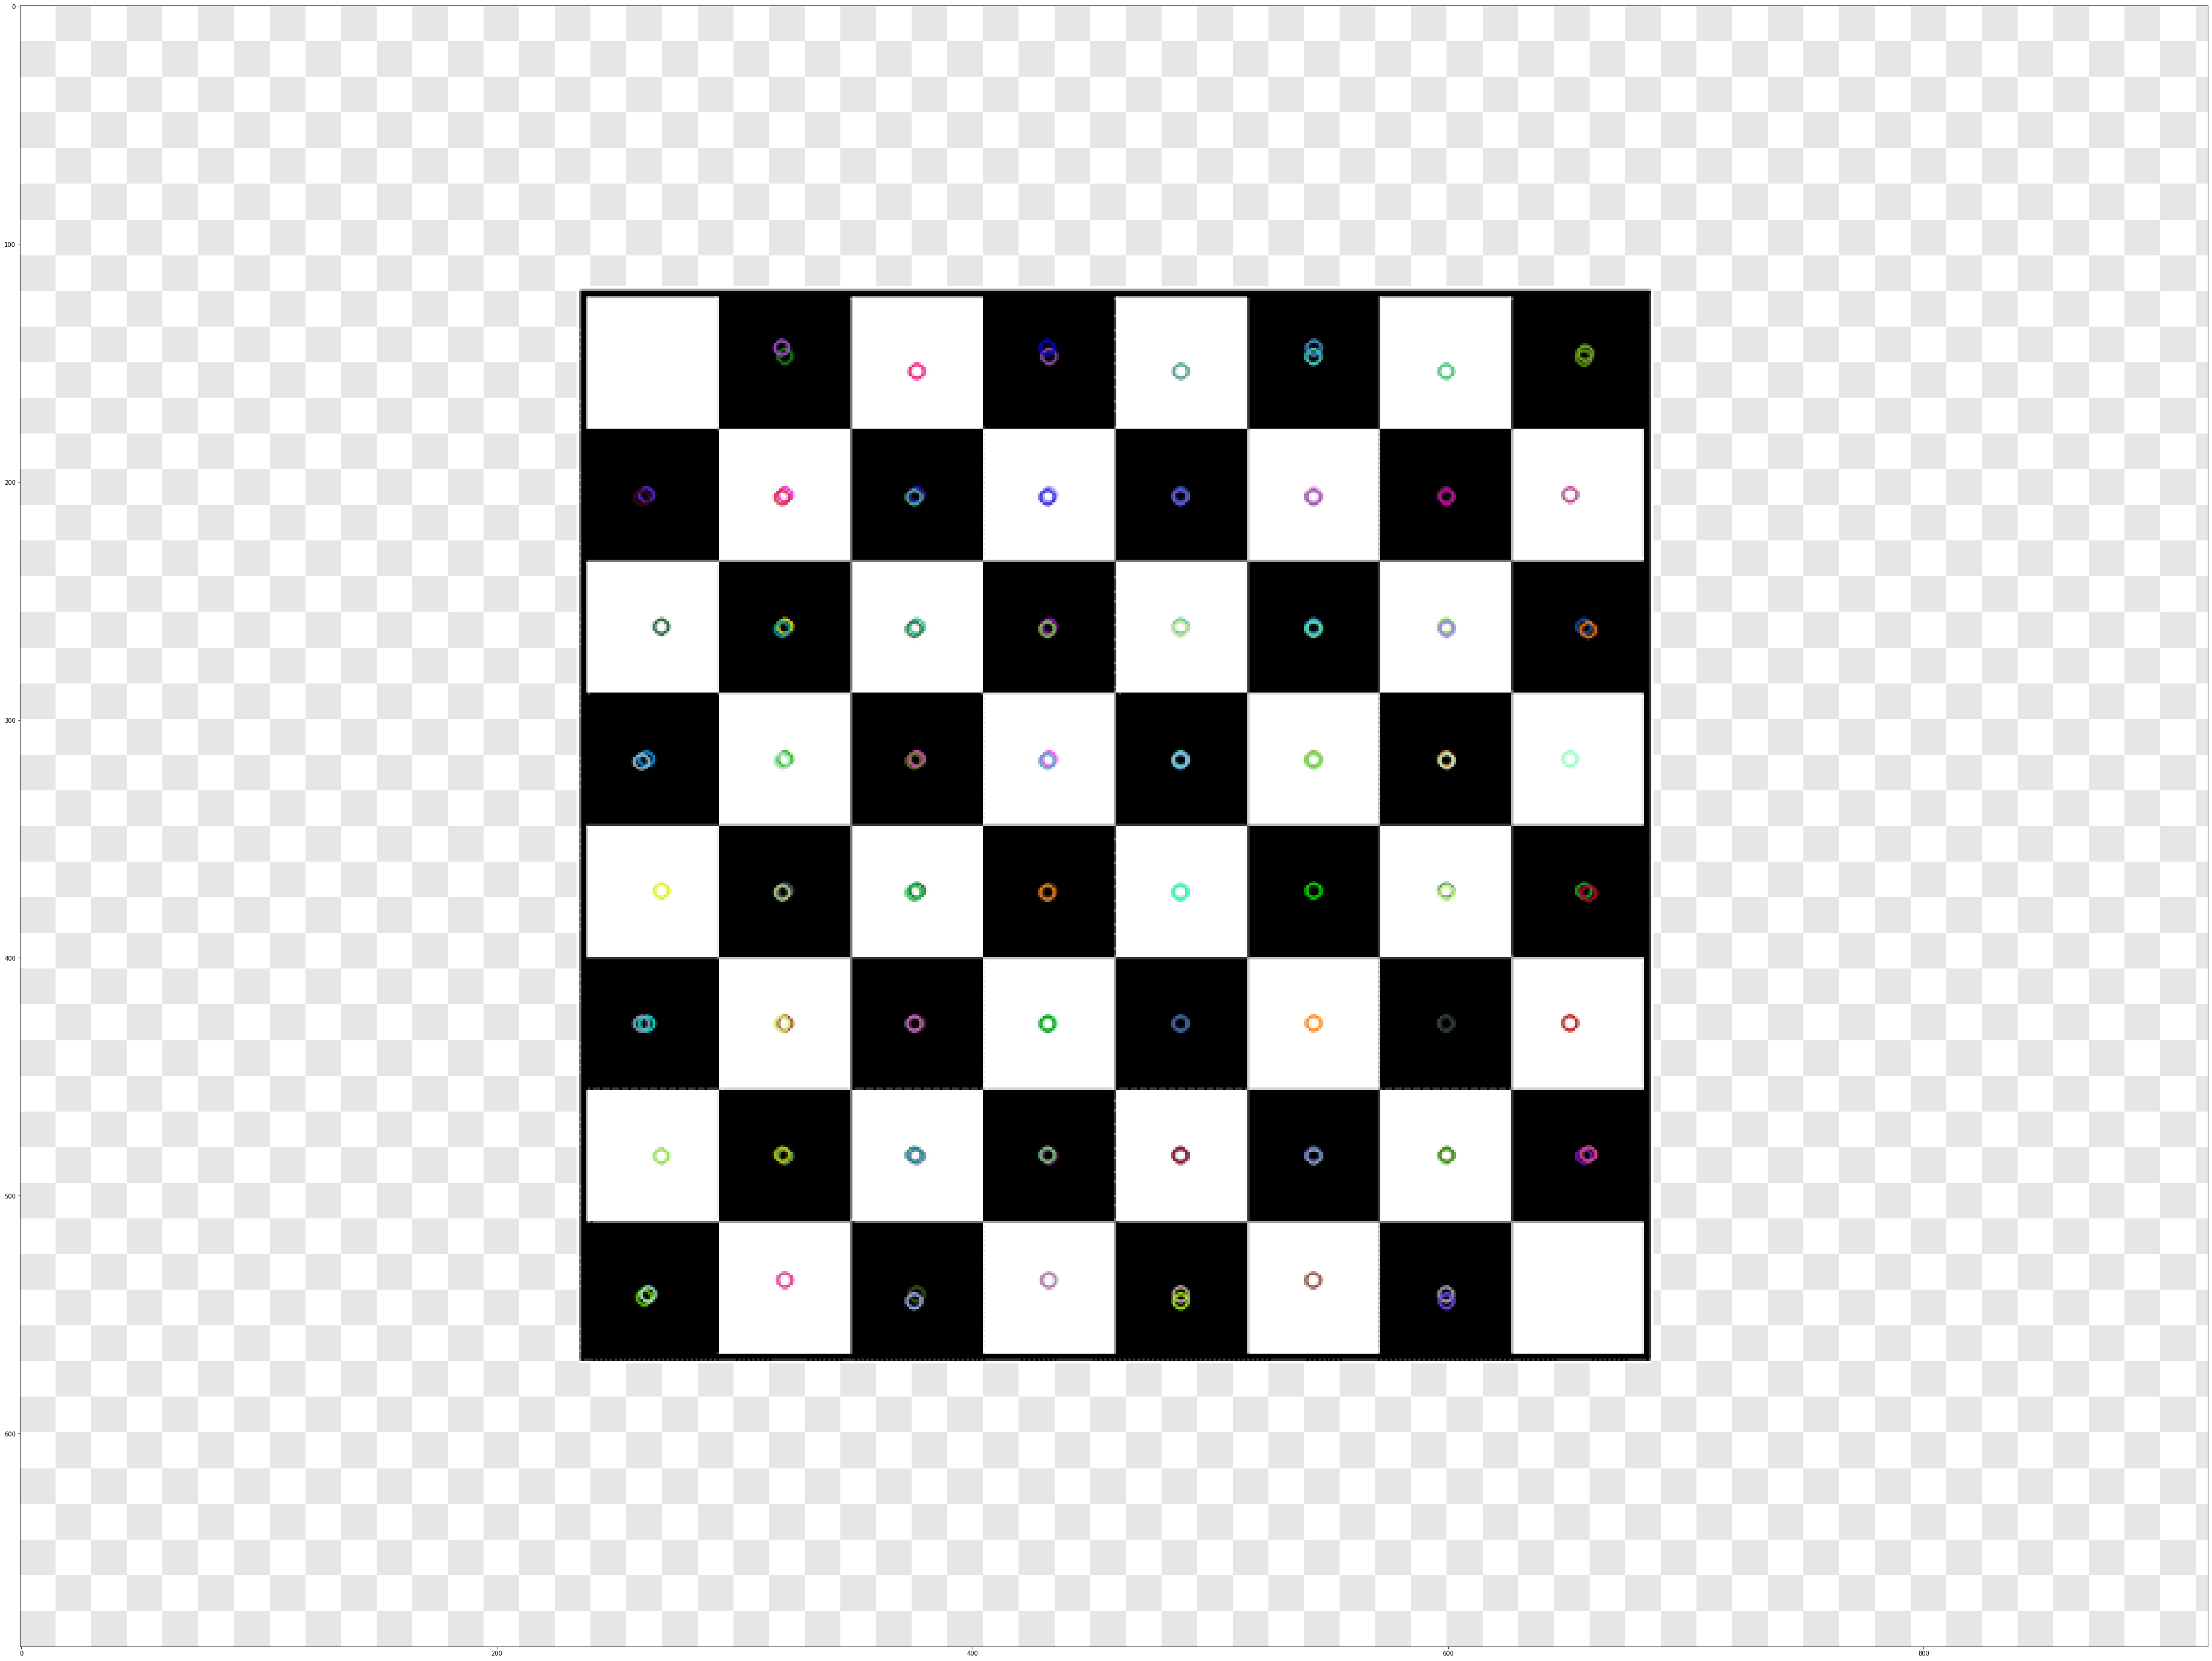

In [4]:
plt.rcParams['figure.figsize'] = [100, 50]
filename = '/content/png-transparent-chessboard-mathematics-board-game-chess-game-symmetry-black.png'
img = cv2.imread(filename)
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print (cv2.__version__)
surf = cv2.xfeatures2d.SURF_create(50000)
kp = surf.detect(gray,None)

img=cv2.drawKeypoints(gray,kp, img)


plt.imshow(img)
plt.show()